# EDA

## Aircraft Engine Predictive Maintenance - RUL Prediction
Dataset: NASA C-MAPSS FD001

### Import libraries and load dataset

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
columns = ['engine_id', 'cycle'] + \
          [f'op_setting_{i}' for i in range(1, 4)] + \
          [f'sensor_{i}' for i in range(1, 22)]

In [77]:
df = pd.read_csv(
    r'..\data\raw\train_FD001.txt',
    sep=' ',
    header=None,
    names=columns
)

In [78]:
df = df.dropna(axis=1)

In [79]:
df.head()

engine_id   cycle  op_setting_1  op_setting_2  op_setting_3  sensor_1  \
1 1    -0.0007 -0.0004         100.0        518.67        641.82   1589.70   
  2     0.0019 -0.0003         100.0        518.67        642.15   1591.82   
  3    -0.0043  0.0003         100.0        518.67        642.35   1587.99   
  4     0.0007  0.0000         100.0        518.67        642.35   1582.79   
  5    -0.0019 -0.0002         100.0        518.67        642.37   1582.85   

     sensor_2  sensor_3  sensor_4  sensor_5  ...  sensor_10  sensor_11  \
1 1   1400.60     14.62     21.61    554.36  ...     521.66    2388.02   
  2   1403.14     14.62     21.61    553.75  ...     522.28    2388.07   
  3   1404.20     14.62     21.61    554.26  ...     522.42    2388.03   
  4   1401.87     14.62     21.61    554.45  ...     522.86    2388.08   
  5   1406.22     14.62     21.61    554.00  ...     522.19    2388.04   

     sensor_12  sensor_13  sensor_14  sensor_15  sensor_16  sensor_17  \
1 1    8138.62     8.4195       0.03        392       2388      100.0   
  2    8131.49     8.4318       0.03        392       2388      100.0   
  3    8133.23     8.4178       0.03        390       2388      100.0   
  4    8133.83     8.3682       0.03        392       2388      100.0   
  5    8133.80     8.4294       0.03        393       2388      100.0   

     sensor_18  sensor_19  
1 1      39.06    23.4190  
  2      39.00    23.4236  
  3      38.95    23.3442  
  4      38.88    23.3739  
  5      38.90    23.4044  

[5 rows x 24 columns]

The FD001 dataset contains run to failure records of turbofan engines.
Each row represents one operatinal cycle of an engine with sensor readings.

### Basic overview of dataset

In [80]:
df.shape

(20631, 24)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 20631 entries, (1, 1) to (100, 200)
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   engine_id     20631 non-null  float64
 1   cycle         20631 non-null  float64
 2   op_setting_1  20631 non-null  float64
 3   op_setting_2  20631 non-null  float64
 4   op_setting_3  20631 non-null  float64
 5   sensor_1      20631 non-null  float64
 6   sensor_2      20631 non-null  float64
 7   sensor_3      20631 non-null  float64
 8   sensor_4      20631 non-null  float64
 9   sensor_5      20631 non-null  float64
 10  sensor_6      20631 non-null  float64
 11  sensor_7      20631 non-null  float64
 12  sensor_8      20631 non-null  float64
 13  sensor_9      20631 non-null  float64
 14  sensor_10     20631 non-null  float64
 15  sensor_11     20631 non-null  float64
 16  sensor_12     20631 non-null  float64
 17  sensor_13     20631 non-null  float64
 18  sensor_14     20

In [82]:
df.describe()

,engine_id,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19
count,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,21.609803,553.367711,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,0.001389,0.885092,...,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,21.600000,549.850000,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,21.610000,552.810000,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,21.610000,553.440000,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,21.610000,554.010000,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,21.610000,556.060000,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [83]:
df.duplicated().sum()

0

In [84]:
df['engine_id'].nunique()

158

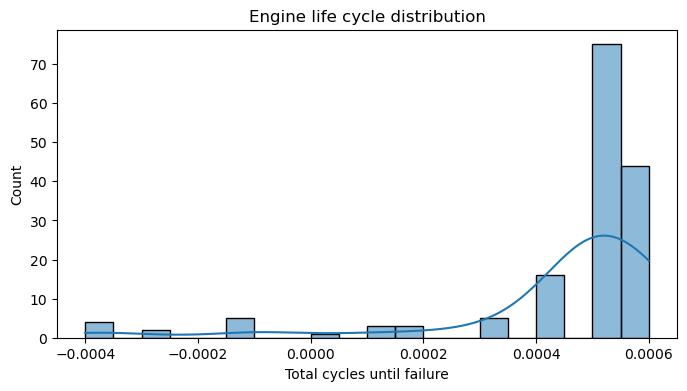

In [85]:
# Engine Life Distribution

engine_life = df.groupby('engine_id')['cycle'].max()
plt.figure(figsize=(8,4))
sns.histplot(engine_life, bins=20, kde=True)
plt.title('Engine life cycle distribution')
plt.xlabel('Total cycles until failure')
plt.ylabel('Count')
plt.show()

In [86]:
# Operating condition check 

for i in range(1,4):
    print(df[[f'op_setting_{i}']].describe())

       op_setting_1
count       20631.0
mean          100.0
std             0.0
min           100.0
25%           100.0
50%           100.0
75%           100.0
max           100.0
       op_setting_2
count  2.063100e+04
mean   5.186700e+02
std    6.537152e-11
min    5.186700e+02
25%    5.186700e+02
50%    5.186700e+02
75%    5.186700e+02
max    5.186700e+02
       op_setting_3
count  20631.000000
mean     642.680934
std        0.500053
min      641.210000
25%      642.325000
50%      642.640000
75%      643.000000
max      644.530000


All Operating settings remain constant across cycles. This confirms that FD001 represents a single opreating condition,
so operating settings can be safely removed during preprocessing.

In [87]:
# Sensor Variance Analysis

sensor_cols = [f'sensor_{i}' for i in range(1,20)]
sensor_variance = df[sensor_cols].var().sort_values()

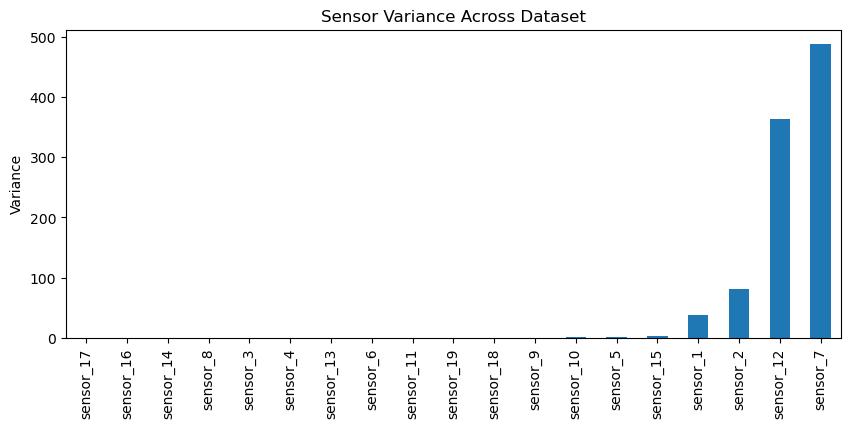

In [88]:
plt.figure(figsize=(10,4))
sensor_variance.plot(kind='bar')
plt.title('Sensor Variance Across Dataset')
plt.ylabel("Variance")
plt.show()

Sensors with near zero variance fo not contribute useful information for degredation modeling and can be removed.

In [89]:
low_variance_sensors = sensor_variance[sensor_variance < 0.01].index.tolist()
low_variance_sensors

['sensor_17',
 'sensor_16',
 'sensor_14',
 'sensor_8',
 'sensor_3',
 'sensor_4',
 'sensor_13',
 'sensor_6',
 'sensor_11']

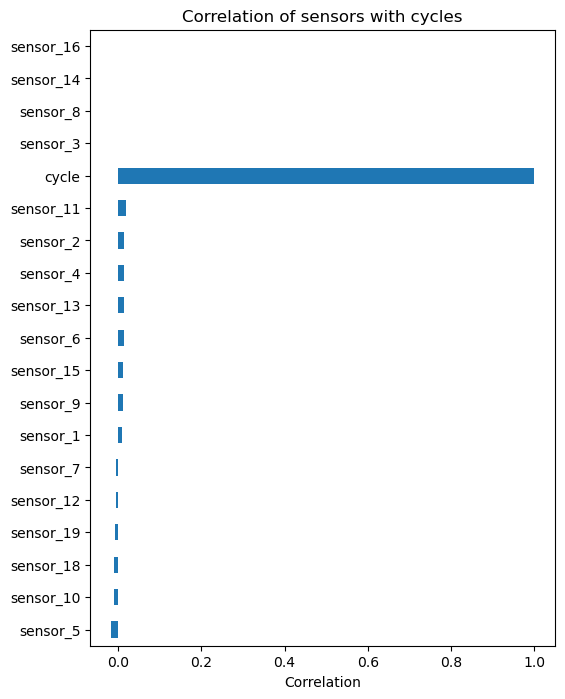

In [90]:
# Correlation with Engine cycle

corr_with_cycle = df[sensor_cols + ['cycle']].corr()['cycle'].sort_values()
plt.figure(figsize=(6,8))
corr_with_cycle[:-1].plot(kind='barh')
plt.title('Correlation of sensors with cycles')
plt.xlabel('Correlation')
plt.show()

Sensors with higher absolute correlation to cycle number are strong candidates for degradation modeling.

## EDA Summary
- FD001 contains 100 engines operating under a single condition.
- Engine lifetimes vary significantly, motivating RUL prediction.
- Operating settings are constant and can be removed.
- Sensors with higher absolute correlation to cycle number are strong candidates for degradation modeling.

These findings guide feature selection and model design in upcoming phases.